In [4]:
import numpy
import matplotlib.pyplot as mp
import scipy.special

array=numpy.zeros((2,3))
array[0,0]=15
array[1,1]=6

print(array)

[[15.  0.  0.]
 [ 0.  6.  0.]]


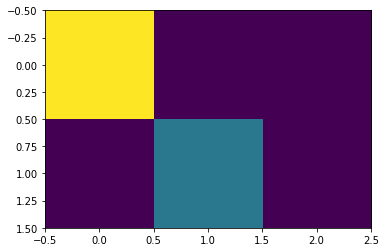

In [7]:
%matplotlib inline

mp.imshow(array,interpolation="nearest")


In [6]:
class NeuralNetwork(object):
    def __init__(self,input_nodes=3,hidden_nodes=3,output_nodes=3,learn_rate=0.3):
        self.in_nodes=input_nodes
        self.out_nodes=output_nodes
        self.hide_nodes=hidden_nodes

        self.learn_rate=learn_rate

        #创建输入层与隐藏层链接矩阵
        #self.w_in_hidden=numpy.random.rand(self.hide_nodes,self.in_nodes)-0.5
        #self.w_hiden_out=numpy.random.rand(self.out_nodes,self.hide_nodes)-0.5

        #complex init weight
        self.w_in_hidden=numpy.random.normal(0.0,pow(self.hide_nodes,-0.5),(self.hide_nodes,self.in_nodes))
        self.w_hiden_out=numpy.random.normal(0.0,pow(self.out_nodes,-0.5),(self.output_nodes,self.hidden_nodes))        

        self.activite_function=lambda x:scipy.special.expit(x)
    
    def working(self,input_list):
        # from input node enter hdden node
        hidden_input = numpy.dot(self.w_in_hidden, input_linst)

        #use activite functiuon ,generate hiden out put
        hidden_output=self.activite_function(hidden_input)

        #from hdden nodes enter output nodes
        output_input=numpy.dot(self.w_hiden_out,hidden_output)

        #use activate function ,generate final out put
        final_output=self.activite_function(output_input)

        return hidden_output,final_output

    def train(self,input_list,target_list):
        hidden_list,result_list=self.working(input_list)

        #error deal
        
        out_put_error=target_list-result_list

        #hidden error = weight_hidden_output(T转置矩阵)*error_out_put
        # 隐藏层的误差为 隐藏层与输出层的权重矩阵 （点乘） 最终结果的误差
        hidden_error=numpy.dot(self.w_hiden_out.T,out_put_error)

        #update weight that close to target
        #dw=[learn_rate]*error*singmoid(out_out)*(1-singmoid(out_put))·(last_level_out_put)(T)

        self.w_hiden_out+=self.learn_rate*numpy.dot((out_put_error*result_list*(1.0-result_list)),numpy.transpose(hidden_list))
        self.w_in_hidden+=self.learn_rate*numpy.dot((hidden_error*hidden_list*(1-hidden_list)),numpy.transpose(input_list))
        
    
    def query(self,input_list):
        _,final_output=self.working(input_list)

        return final_output
